### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


<BR>

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

### Import Modules 
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

### Import & Check the Dataset
***

In [2]:
df = pd.read_csv('Wind-Power.csv')
#pd.set_option("display.max_rows", None)#Option to Show the entire dataset
pd.set_option('max_colwidth',100)
#df #Option to Print the Dataset

In [3]:
#Check if characters in the data imported is the same type
#df.dtypes

In [4]:
#Check if there are any empty cells in the dataframe
pd.set_option("display.max_rows",500)# Option to display all entries
df.style.highlight_null(null_color='red'); #highlight any null values in red
#print(df.isnull()) #Option to print the dataset

In [5]:
#Check for corrupt data
#print ("power shape = ",df.shape)

In [6]:
#Re-name the columns from the original dataset
df.rename(columns={'speed':'Speed_Mph'},inplace = True)
df.rename(columns={'power':'Power_KWph'},inplace = True)

### Review the Data
***

In [7]:
#Show the entire dataset sorted by 'Speed_Mph'
pd.set_option("display.max_rows", None)#Show the entire dataset
pd.set_option("display.precision", 3) #Round the results to 3 decimal places
df.sort_values(by =['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#https://datatofish.com/sort-pandas-dataframe/
df.style.set_properties(subset = ["Power KWph", "Speed Mph"], **{'text-align': 'right'})
#https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
print ("")

In [8]:
#Option to print the dataset
#df[['Speed_Mph','Power_KWph','Power:Speed']]

### Add Classification Columns
***

#### Create a New Column called 'Power:Speed'

In [9]:
#Add Power/Speed Column
df['Power:Speed'] = (df ['Power_KWph'] / df ['Speed_Mph']) #Add Power/Speed Column
pd.set_option("display.precision", 3)
df.style.set_properties(subset=["Power_KWph", "Speed_Mph"], **{'text-align': 'centre'});
#https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe
#del df['power/speed']; #delete additional column
#df

#### Create a New Column identifying rows where Power_KWph = 0 and Speed_Mph > 8 and less than 55mph

In [40]:
# Create a new Column identifying rows where Power_KWph = 0 and Speed_Mph > 8 and less than 55mph
def Power(row):
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 8:
        return 'Out of Order'
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 55:
        return 'Shut Down'    
    if row['Power_KWph'] == 0 and row['Speed_Mph'] ==0:
        return 'Test'  
    else:
        return 'Normal'
    
#To populate a column called 'Power Staus' in the dataframe from the results above  
df['Status'] = df.apply(lambda row: Power(row), axis=1)
#df = df.drop('Zero Power', axis=1)
pd.set_option("display.precision", 3)
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in ascending order


#### Create a New Column called 'Optimum Ratio' based on Power:Speed Ratio

In [11]:
def Optimum(row):

    if row['Power:Speed'] ==0 and row['Speed_Mph'] > 8:
        return 'Assumed Out of Order'
    if row['Power:Speed'] ==0 and row['Speed_Mph'] < 8:
        return 'Zero Power Output - Low Wind Speed (< 8mph)'
    if row['Speed_Mph']== 0 and row['Power_KWph'] == 0:
        return 'Test'
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] < 8:
        return 'Sub Optimum Power Output: Wind Speed < 6 (Wind Speed < 8mph)' 
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] >= 8:
        return 'Sub Optimum Power Output: Wind Speed < 6 (Wind Speed > 8mph)'         
    if row['Power:Speed'] >= 6 and row['Power:Speed'] <= 8:
        return 'Optimum Power Output: Wind Speed (6-8)'     
    if row['Power:Speed'] > 8 and row['Speed_Mph'] < 8 :
        return 'Exceptional Power Output: Wind Speed ( > 8)'    
    if row['Power:Speed'] > 8 and row['Speed_Mph'] >= 8:
        return '> Optimum'             
    else:
        return 'null'
    
#To populate a column called 'Optimum_Ratio' in the dataframe from the results above  
pd.set_option('mode.chained_assignment', None)#Turn off chained warnings
#https://www.dataquest.io/blog/settingwithcopywarning/
df['Classification'] = df.apply(lambda row: Optimum(row), axis=1) 


### Summarise the Data
***

In [12]:
#Show basic summary information
pd.set_option("display.precision", 0)
# https://realpython.com/pandas-groupby/
df.describe()

,Speed_Mph,Power_KWph,Power:Speed
count,500,500,499
mean,13,48,3
std,7,42,2
min,0,0,0
25%,6,5,1
50%,13,42,4
75%,19,94,5
max,25,114,14


In [39]:
df[['Status','Power_KWph']].groupby(['Status']).count()

,Power_KWph
Status,
Normal,485
Out of Order,14
Test,1


In [13]:
df[['Classification','Power_KWph','Status']].groupby(['Classification','Status']).count()

,,Power_KWph
Classification,Status,
Assumed Out of Order,Out of Order,14
Exceptional Power Output: Wind Speed ( > 8),Normal,10
Optimum Power Output: Wind Speed (6-8),Normal,2
Sub Optimum Power Output: Wind Speed < 6 (Wind Speed < 8mph),Normal,116
Sub Optimum Power Output: Wind Speed < 6 (Wind Speed > 8mph),Normal,323
Test,Test,1
Zero Power Output - Low Wind Speed (< 8mph),Normal,34


### Identify Trends & Remove Outliers:
***

In [14]:
print("")
pd.set_option("display.precision", 2)
# https://realpython.com/pandas-groupby/
df.style.set_properties(subset = ["Power_KWph", "Speed_Mph"], **{'text-align': 'center'});
#df.groupby(['Power_KWph']).agg(['count'])

#### Summary of Findings:
- 49 Results where Power Output = Zero
- 10 Results where Power: Speed Ratio was in excess of 8 at low wind speeds

#### Analyse the Results where Power Output equals Zero:

In [35]:
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#df = df.drop('Power:Speed', axis=1)

#Option to print the dataset subset where Power_KWph = 0
#df[df['Power_KWph'] == 0]

#### Conclusion

14 samples were identified as being 'outliers' i.e. where wind speed was in excess of 8 Mph and power output was zero.  These samples were removed as it can be assumed that the turbine was out of order.  These samples were classed as 'Out of Order'  

1 sample was removed where wind speed and power output were zero.  This was classed as a 'Test'

34 samples were identified with zero power output at wind speeds less than 8mph.  It has been assumed that this is normal.

10 further possible 'outliers ' were identified where wind speed was below 8 and power:speed ratio was above 8.  These samples are exceptional and potentially incorrect records but they have been left in for the purposes of the analysis.

#### Create a Subset Dataframe (df2) Excluding Outliers

In [16]:
pd.set_option("display.precision", 3)
df1 = df[df['Status'] != 'Normal'] # Outlier Only Dataframe
df2 = df[df['Status'] == 'Normal'] # Excluding Outliers Dataframe

#Option to print the new dataset
print(" - Samples in Original Dataframe:",len(df),"\n","- Samples in New Dataframe:",len(df2),"\n","- Number of Outliers removed from Original Dataframe:",len(df1),"\n")

 - Samples in Original Dataframe: 500 
 - Samples in New Dataframe: 485 
 - Number of Outliers removed from Original Dataframe: 15 



In [17]:
df[['Status','Power_KWph']].groupby(['Status']).count()

,Power_KWph
Status,
Normal,485
Out of Order,14
Test,1


In [18]:
df2.sort_values(by=['Power:Speed'], inplace=True, ascending=False)#Sort the dataset in ascending order
df2.describe()

#Option to print the dataset with new column
#df2

,Speed_Mph,Power_KWph,Power:Speed
count,485.000,485.000,485.000
mean,12.324,49.500,3.319
std,7.069,41.374,2.237
min,0.125,0.000,0.000
25%,6.156,5.947,1.241
50%,12.362,44.801,3.961
75%,18.393,93.769,4.934
max,24.399,113.556,13.903


### Visualise the Data:
***

#### Plot Original Dataset including Outliers

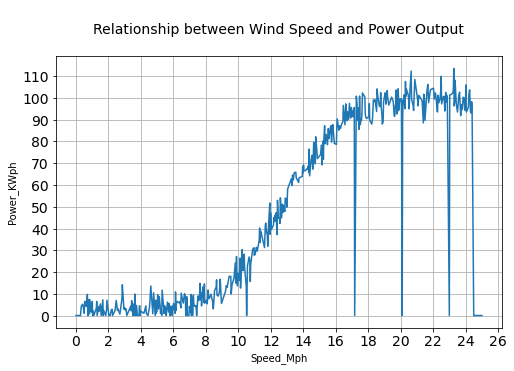

In [19]:
plt.figure(figsize = (8, 5)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df.Speed_Mph,y=df.Power_KWph)
plt.show()

#### Plot the New Dataset with Outages' (Out of Order Samples) Removed

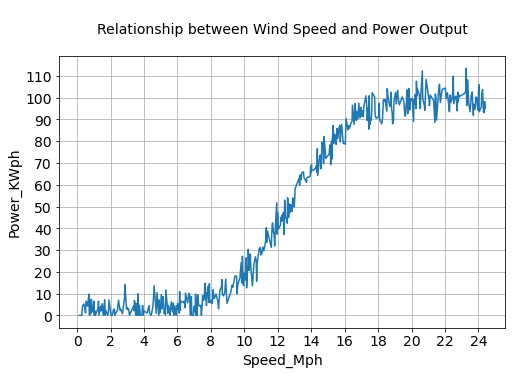

In [20]:
plt.figure(figsize = (8, 5)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df2.Speed_Mph,y=df2.Power_KWph)
plt.show()

### More Plots:
***

#### Plot the Frequency of Speed and Power

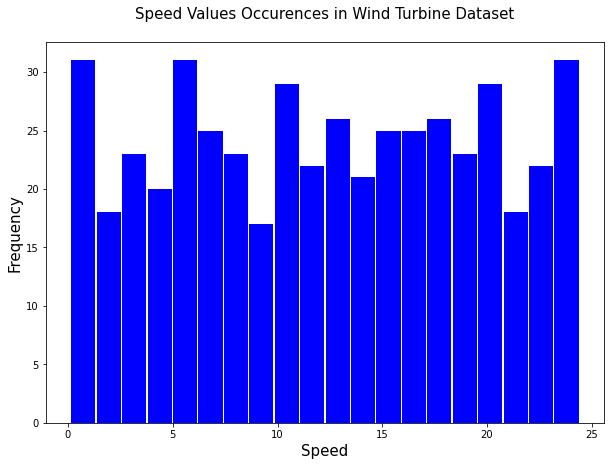

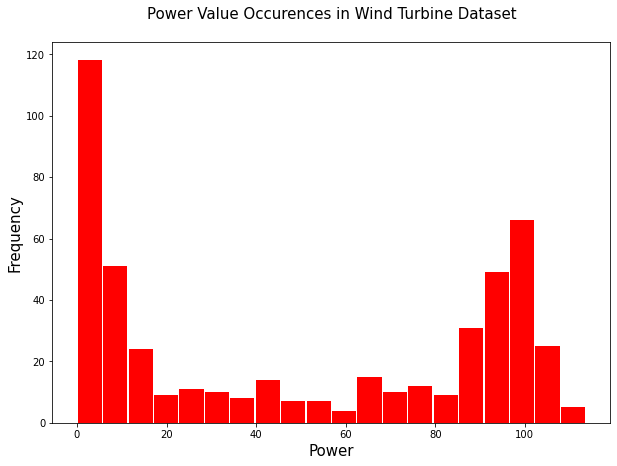

In [21]:
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Speed_Mph"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Speed Values Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Speed", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Power_KWph"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Power Value Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Power", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()

#### Plot Speed and Power Results on the Same Axis


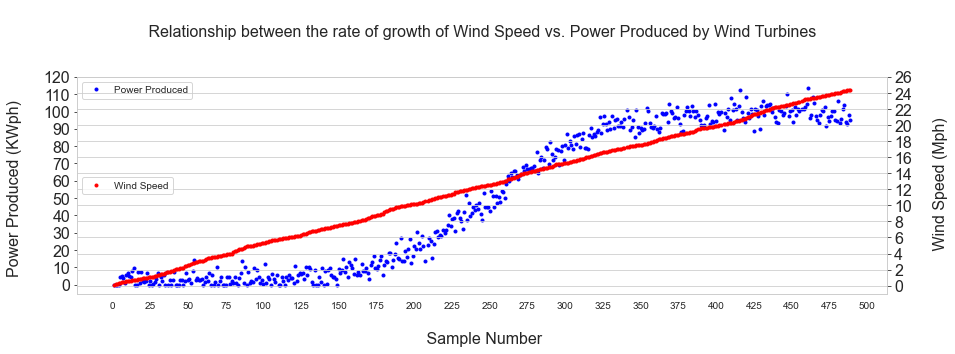

In [22]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes
plt.rcParams["axes.labelsize"] = 8
sns.set_style ("whitegrid")
fig, ax = plt.subplots()
rspine = ax.spines ['right']
rspine.set_position (('axes', 1))
ax.set_frame_on (True)
ax.patch.set_visible (True)
ax.grid(True)
fig.subplots_adjust(right = 2)
df2.Power_KWph.plot(ax = ax, style = 'b.',label = "Power Produced")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120],fontsize = 16)
ax.legend(loc = 0)
plt.xlabel("\n Sample Number",fontsize = 16)
plt.ylabel("Power Produced (KWph) \n",fontsize = 16)

# same ax as above since it's automatically added on the right
df2.Speed_Mph.plot(ax = ax, style = 'r.', label = "Wind Speed", secondary_y = True)
plt.yticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26],fontsize = 16)
plt.xticks([0,25, 50,75, 100, 125, 150, 175, 200, 225, 250, 275,300,325,350,375,400,425,450,475,500],fontsize = 16)
plt.ylabel("\n Wind Speed (Mph)",fontsize = 16)
plt.title("\n Relationship between the rate of growth of Wind Speed vs. Power Produced by Wind Turbines \n\n" , fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend (loc = "center left", frameon = True)
bbox_to_anchor=(10, 500)
plt.show()


### Plot the New Dataset (df2) as a Scatterplot with a Regression Line:

<Figure size 720x432 with 0 Axes>

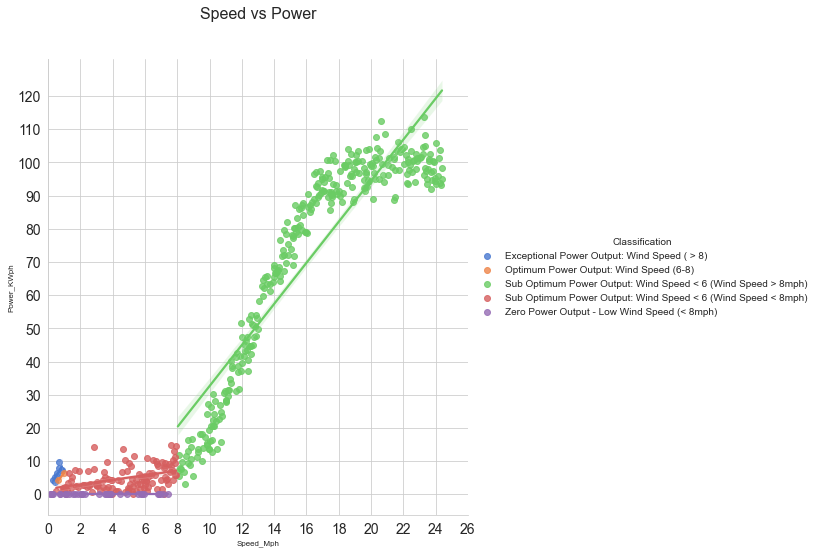

In [23]:
print ("")
#plt.rcParams["figure.figsize"] = (12,8)
plt.figure(figsize = (10, 6)) 
sns.set_style ("whitegrid")
sns.lmplot(x="Speed_Mph", y='Power_KWph', hue='Classification', palette="muted", height = 7 ,data=df2);#use data including power outages
plt.title("Speed vs Power\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14;
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14)
plt.show()

### Predict Expected Power based on a Given Speed
***

In [24]:
%matplotlib inline
from sklearn.linear_model import LinearRegression

#### Polyfit

In [25]:
#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

Polyfit = np.polyfit (df2.Speed_Mph,df2.Power_KWph,1)
print ('Best Fit Line Values:\n')
print ("- 'm' (slope) of 'Best Fit Line' is", Polyfit[0] )
print ("- 'c' (co-efficient) of 'Best Fit Line' is", Polyfit[1] )

Best Fit Line Values:

- 'm' (slope) of 'Best Fit Line' is 5.560605310547433
- 'c' (co-efficient) of 'Best Fit Line' is -19.02748282150619


#### Alternative method of calculating the slope (m) and the co-efficient (c)

In [26]:
# First calculate the means (a.k.a. averages) of df2.Speed_Mph and df2.Power_KWph:
df2.Speed_Mph_avg = np.mean(df2.Speed_Mph)
df2.Power_KWph_avg = np.mean(df2.Power_KWph)

# Subtract means from df2.Speed_Mph and df2.Power_KWph:
df2.Speed_Mph_zero = df2.Speed_Mph - df2.Speed_Mph_avg
df2.Power_KWph_zero = df2.Power_KWph - df2.Power_KWph_avg

# The best m is found by the following calculation:
m = np.sum(df2.Speed_Mph_zero * df2.Power_KWph_zero) / np.sum(df2.Speed_Mph_zero * df2.Speed_Mph_zero)

# Use m from above to calculate the best c:
c = df2.Power_KWph_avg - m * df2.Speed_Mph_avg

print ('\nBest Fit Line Values:\n')
print ("- The slope of the 'Best Fit Line'(m)is",(round(m,6)))
print ("- The value of y when x = 0 of the 'Best Fit' Line (c) is",round(c,6),"\n")



Best Fit Line Values:

- The slope of the 'Best Fit Line'(m)is 5.560605
- The value of y when x = 0 of the 'Best Fit' Line (c) is -19.027483 



<ipython-input-26-418ae736fd8e>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.Speed_Mph_zero = df2.Speed_Mph - df2.Speed_Mph_avg
<ipython-input-26-418ae736fd8e>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.Power_KWph_zero = df2.Power_KWph - df2.Power_KWph_avg


#### Fitting the Model

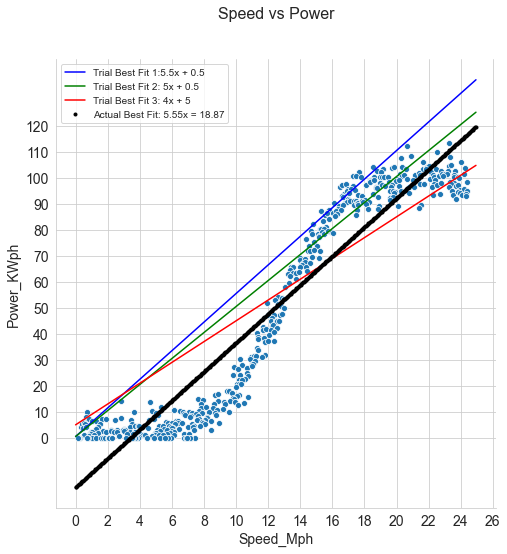

In [27]:
print ("")
plt.rcParams["figure.figsize"] = (28,24)
#plt.figure(figsize = (8, 6)) 
sns.set_style ("whitegrid")
#plt.plot (df2.Speed_Mph,df2.Power_KWph,'y.', label = r"Actual Data")
sns.relplot(x = "Speed_Mph", y = 'Power_KWph', palette="muted",height = 7, data=df2)#use data including power outages
plt.title("Speed vs Power\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14)

#Generate Trial Data to estimate the 'Best Fit Line'
x = np.arange (0.0,25.0,(1/len(df2.Speed_Mph)*25))
plt.plot (x, 5.5 * x + 0.5, 'b-', label = r"Trial Best Fit 1:5.5x + 0.5")
plt.plot (x, 5 * x + 0.5, 'g-', label = r"Trial Best Fit 2: 5x + 0.5")
plt.plot (x, 4 * x + 5, 'r-', label = r"Trial Best Fit 3: 4x + 5")

#Use the Polyfit results to generate the 'Best Fit Line' 
y = Polyfit[0] * x + Polyfit[1]
plt.plot (x, y, 'k.', label = r"Actual Best Fit: 5.55x = 18.87")# Plot the best fit line over the data points.
plt.legend()
plt.show()



In [28]:
#Check to make sure the length of the arrays are equal
#print(len(df2.Speed_Mph),len(x))

In [29]:
#Best Fit Co-ordinates
#print (list(zip(x,y)))

#### Calculate the 'Cost' of the Lines Above

In [30]:
#cost = lambda m,c: np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(len(df2.Speed_Mph))]
#print("Cost with m = ",m,"and c =",c,":",%8.2f % (cost(m, c)))

In [31]:
#cost 'Best Fit' = lambda Polyfit[0],Polyfit[1]: np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(df2.Speed_Mph.size)])
#cost = np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(len(df2.Speed_Mph))])

#print("Cost with m =", Polyfit[0], "and c =", Polyfit[1],"is", cost)
#print("Cost with m = Polyfit[0] and c = Polyfit[0]: %8.2f" % (cost(Polyfit[0],  Polyfit[1])))
#print("Cost with m = Polyfit[0] and c = Polyfit[0]:" %8.2f" % (cost(4.0, 5.0)))

<BR>

### Predict expected speed based on a Given Power
***

#### Using Numpy Poly1d Method

In [32]:
Predict = np.poly1d (Polyfit)
#https://data36.com/linear-regression-in-python-numpy-polyfit/

#### Insert Value for 'P' (Speed) to Predict Power Output

In [33]:
P = 6  #Value of Speed 
print ("\nThe Predicted Power Output for a Wind Speed of",P,"Mph is",round(Predict(P),3),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.336 KWph



#### Alternative Method - Manual method using Polyfit Results:

In [34]:
y = Polyfit [0] * P + Polyfit [1]
print ("\nThe Predicted Power Output for a Wind Speed of",P,"Mph is",round(y,3),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.336 KWph



### End

***

#### End